In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

%config InlineBackend.figure_format = 'svg'
%matplotlib inline

In [117]:
from sklearn.datasets import load_boston

boston = load_boston()
data = boston["data"]
feature_names = boston["feature_names"]

X = pd.DataFrame(data, columns = feature_names)
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [118]:
target = boston["target"]
y = pd.DataFrame(target, columns = ["price"])
y.head()

,price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [119]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 42)

In [120]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
stand_features = scaler.fit_transform(data)
print(stand_features)

[[-0.41978194  0.28482986 -1.2879095  ... -1.45900038  0.44105193
  -1.0755623 ]
 [-0.41733926 -0.48772236 -0.59338101 ... -0.30309415  0.44105193
  -0.49243937]
 [-0.41734159 -0.48772236 -0.59338101 ... -0.30309415  0.39642699
  -1.2087274 ]
 ...
 [-0.41344658 -0.48772236  0.11573841 ...  1.17646583  0.44105193
  -0.98304761]
 [-0.40776407 -0.48772236  0.11573841 ...  1.17646583  0.4032249
  -0.86530163]
 [-0.41500016 -0.48772236  0.11573841 ...  1.17646583  0.44105193
  -0.66905833]]


In [121]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

X_train_tsne = tsne.fit_transform(stand_features)

print('До:\t{}'.format(stand_features.shape))
print('После:\t{}'.format(X_train_tsne.shape))

До:	(506, 13)
После:	(506, 2)


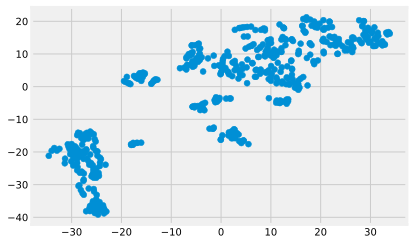

In [122]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

plt.show()

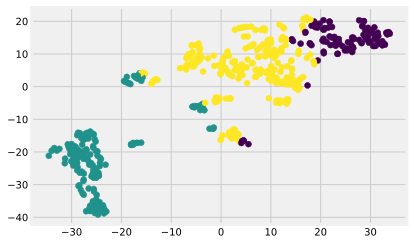

In [123]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42)

labels_train = kmeans.fit_predict(stand_features)

plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)

plt.show()

In [124]:
y.mean()

price    22.532806
dtype: float64

In [125]:
y[labels_train == 0].mean()

price    28.483
dtype: float64

In [126]:
y[labels_train == 1].mean()

price    16.234969
dtype: float64

In [127]:
y[labels_train == 2].mean()

price    24.308642
dtype: float64

In [128]:
crim = X['CRIM'].to_numpy()

In [129]:
crim[labels_train == 0].mean()

0.0705579

In [130]:
crim[labels_train == 1].mean()

10.597187914110428

In [131]:
crim[labels_train == 2].mean()

0.38701851851851854